In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos

In [35]:
df = pd.read_csv(r"C:\Users\javier.sdiaz\Proyecto ML_2025\data\raw\PFV Machine Learning.csv", sep=";")
df.head()

Fecha_Hora     Temp_amb Radiacion_1 Radiacion_2   Dir_viento  \
0  01/01/2022 0:00  11,34651225           0           0  222,5584223   
1  01/01/2022 0:15  11,30000019           0           0  223,0875892   
2  01/01/2022 0:30  11,30666706           0           0  224,8936094   
3  01/01/2022 0:45  11,29333332           0           0  223,5345474   
4  01/01/2022 1:00  11,25985316           0           0  230,9272346   

    Vel_viento      Energia Potencia     Oil_Temp cosPhi  ... Idc4 Idc5 Idc6  \
0  2,611366846  26,93174724        0  26,07907206      0  ...    0    0    0   
1  2,582712548            0        0  25,47908349      0  ...    0    0    0   
2  2,640629441            0        0  24,87909492      0  ...    0    0    0   
3  2,808004556            0        0   24,2791821      0  ...    0    0    0   
4  3,147298226            0        0  23,74596804      0  ...    0    0    0   

  Idc7 Idc8     Temp_int  Q           V1           V2           V3  
0    0    0  20,32976765  0  381,3455601  384,5984618  380,3636747  
1    0    0  20,17977039  0   381,767485  384,8353054  380,9201517  
2    0    0  20,02977313  0  382,8284386  385,5443126   382,013119  
3    0    0  19,87977586  0  383,7695102  386,4041716  382,9180621  
4    0    0  19,74149471  0  382,8361455  385,6313798  382,1717213  

[5 rows x 27 columns]

# 2. Análisis exploratorio

Sustituición de "," por "." para el tratamiento de los datos.

In [36]:
df = df.apply(lambda x: x.str.replace(",", ".", regex=True) if x.dtype == "object" else x)
df.head()

Fecha_Hora     Temp_amb Radiacion_1 Radiacion_2   Dir_viento  \
0  01/01/2022 0:00  11.34651225           0           0  222.5584223   
1  01/01/2022 0:15  11.30000019           0           0  223.0875892   
2  01/01/2022 0:30  11.30666706           0           0  224.8936094   
3  01/01/2022 0:45  11.29333332           0           0  223.5345474   
4  01/01/2022 1:00  11.25985316           0           0  230.9272346   

    Vel_viento      Energia Potencia     Oil_Temp cosPhi  ... Idc4 Idc5 Idc6  \
0  2.611366846  26.93174724        0  26.07907206      0  ...    0    0    0   
1  2.582712548            0        0  25.47908349      0  ...    0    0    0   
2  2.640629441            0        0  24.87909492      0  ...    0    0    0   
3  2.808004556            0        0   24.2791821      0  ...    0    0    0   
4  3.147298226            0        0  23.74596804      0  ...    0    0    0   

  Idc7 Idc8     Temp_int  Q           V1           V2           V3  
0    0    0  20.32976765  0  381.3455601  384.5984618  380.3636747  
1    0    0  20.17977039  0   381.767485  384.8353054  380.9201517  
2    0    0  20.02977313  0  382.8284386  385.5443126   382.013119  
3    0    0  19.87977586  0  383.7695102  386.4041716  382.9180621  
4    0    0  19.74149471  0  382.8361455  385.6313798  382.1717213  

[5 rows x 27 columns]

Se transforma la serie temporal en una regresión, para ello se extraen las características más utiles de la columna Fecha_Hora y se generan nuevas columnas que nos ayuden al tratamiento de los datos.

In [37]:
# Convertimos la columna a tipo datetime 
df["Fecha_Hora"] = pd.to_datetime(df["Fecha_Hora"], format="%d/%m/%Y %H:%M", dayfirst=True)


# 📌 Desglose de la fecha en variables útiles
df["Año"] = df["Fecha_Hora"].dt.year
df["Mes"] = df["Fecha_Hora"].dt.month
df["Día"] = df["Fecha_Hora"].dt.day
df["Hora"] = df["Fecha_Hora"].dt.hour
df["Minuto"] = df["Fecha_Hora"].dt.minute


# 📌 Función para asignar la estación del año
def get_estacion(mes, dia):
    if (mes == 12 and dia >= 21) or (mes <= 3 and (mes != 3 or dia < 20)):
        return "Invierno"
    elif (mes == 3 and dia >= 20) or (mes < 6) or (mes == 6 and dia < 21):
        return "Primavera"
    elif (mes == 6 and dia >= 21) or (mes < 9) or (mes == 9 and dia < 23):
        return "Verano"
    else:
        return "Otoño"

# Aplicamos la función a cada fila
df["Estacion"] = df.apply(lambda x: get_estacion(x["Mes"], x["Día"]), axis=1)

df.drop(columns=["Fecha_Hora"], inplace=True)


df.head()


Temp_amb Radiacion_1 Radiacion_2   Dir_viento   Vel_viento      Energia  \
0  11.34651225           0           0  222.5584223  2.611366846  26.93174724   
1  11.30000019           0           0  223.0875892  2.582712548            0   
2  11.30666706           0           0  224.8936094  2.640629441            0   
3  11.29333332           0           0  223.5345474  2.808004556            0   
4  11.25985316           0           0  230.9272346  3.147298226            0   

  Potencia     Oil_Temp cosPhi   Frecuencia  ...  Q           V1           V2  \
0        0  26.07907206      0  49.96049904  ...  0  381.3455601  384.5984618   
1        0  25.47908349      0  49.95999908  ...  0   381.767485  384.8353054   
2        0  24.87909492      0  49.95999908  ...  0  382.8284386  385.5443126   
3        0   24.2791821      0  49.95999908  ...  0  383.7695102  386.4041716   
4        0  23.74596804      0  49.96050291  ...  0  382.8361455  385.6313798   

            V3   Año Mes Día Hora Minuto  Estacion  
0  380.3636747  2022   1   1    0      0  Invierno  
1  380.9201517  2022   1   1    0     15  Invierno  
2   382.013119  2022   1   1    0     30  Invierno  
3  382.9180621  2022   1   1    0     45  Invierno  
4  382.1717213  2022   1   1    1      0  Invierno  

[5 rows x 32 columns]

Se generan las siguientes columnas a traves de la variable Fecha_Hora
- Año.
- Mes.
- Día.
- Día de la semana (Lunes=0 ; Domingo=6)
- Hora.
- Minuto, en este caso (0,15,30,45).
- Estación.

In [38]:
# Tamaño del dataset (filas, columnas)
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (105216, 32)


In [39]:
# Información general del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105216 entries, 0 to 105215
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Temp_amb       105216 non-null  object
 1   Radiacion_1    105216 non-null  object
 2   Radiacion_2    105216 non-null  object
 3   Dir_viento     105216 non-null  object
 4   Vel_viento     105216 non-null  object
 5   Energia        105216 non-null  object
 6   Potencia       105216 non-null  object
 7   Oil_Temp       105216 non-null  object
 8   cosPhi         105216 non-null  object
 9   Frecuencia     105216 non-null  object
 10  HeatsinkRTemp  105216 non-null  object
 11  HeatsinkSTemp  105216 non-null  object
 12  HeatsinkTTemp  105216 non-null  object
 13  Idc1           105216 non-null  object
 14  Idc2           105216 non-null  object
 15  Idc3           105216 non-null  object
 16  Idc4           105216 non-null  object
 17  Idc5           105216 non-null  object
 18  Idc6

El dataset consta de 33 columnas y 105216 filas, con ausencia de nulos y huecos, todas las columnas son del tipo object , se va realizar una conversión de las columnas tipo object a numéricas para realizar el análisis de las mismas.

In [40]:
cols_a_convertir = ["Temp_amb","Radiacion_1","Radiacion_2","Dir_viento","Vel_viento","Energia","Potencia","Oil_Temp","cosPhi","Frecuencia","HeatsinkRTemp","HeatsinkSTemp",
                    "HeatsinkTTemp","Idc1","Idc2","Idc3","Idc4","Idc5","Idc6","Idc7","Idc8","Temp_int","Q","V1","V2","V3","Año","Mes","Día","Hora","Minuto"]
df[cols_a_convertir] = df[cols_a_convertir].apply(pd.to_numeric, errors='coerce')


In [41]:
# Descripción estadística
df.describe()

Temp_amb    Radiacion_1    Radiacion_2     Dir_viento  \
count  105216.000000  105216.000000  105216.000000  105216.000000   
mean       12.434834     149.429818     149.851044     189.632923   
std         7.528762     249.042306     247.950169      86.791055   
min        -8.758406       0.000000       0.000000       0.000000   
25%         7.277321       0.000000       0.000000     121.773551   
50%        11.807720       3.633737       4.009261     211.231500   
75%        17.394284     195.778226     196.515882     255.145664   
max        40.207415    1226.789514    1201.072162     356.690945   

          Vel_viento        Energia       Potencia       Oil_Temp  \
count  105216.000000  105216.000000  105216.000000  105216.000000   
mean        3.303892    2869.902481     273.995899      34.597658   
std         2.002221    3915.102256     459.076759      18.316067   
min         0.000000       0.000000      -5.318807      -2.680146   
25%         1.802383       0.000000       0.000000      20.306889   
50%         2.887681     885.517786       0.000000      32.657737   
75%         4.445299    4601.229980     362.855464      47.491746   
max        15.786159   16726.449220    1745.548482     102.548603   

              cosPhi     Frecuencia  ...       Temp_int              Q  \
count  105216.000000  105216.000000  ...  105216.000000  105216.000000   
mean        0.462793      49.599066  ...      21.312620      15.978630   
std         0.482716       4.421508  ...       8.091732      38.979943   
min        -0.908207       0.000000  ...       0.000000     -10.786537   
25%         0.000000      49.981276  ...      15.242664       0.000000   
50%         0.091591      49.994610  ...      20.719887       0.000000   
75%         0.998561      50.007424  ...      27.094039       1.525612   
max         1.000000      50.125190  ...      51.055500     214.991643   

                  V1             V2             V3            Año  \
count  105216.000000  105216.000000  105216.000000  105216.000000   
mean      380.157982     379.248981     379.334109    2023.000912   
std        34.221478      34.103844      34.140209       0.816686   
min         0.000000       0.000000       0.000000    2022.000000   
25%       380.542851     379.818017     379.740740    2022.000000   
50%       382.388063     382.236170     381.777504    2023.000000   
75%       384.650165     384.636391     384.311038    2024.000000   
max       398.754277     395.419819     397.148148    2024.000000   

                 Mes            Día           Hora        Minuto  
count  105216.000000  105216.000000  105216.000000  105216.00000  
mean        6.522696      15.732740      11.500000      22.50000  
std         3.448997       8.801501       6.922219      16.77059  
min         1.000000       1.000000       0.000000       0.00000  
25%         4.000000       8.000000       5.750000      11.25000  
50%         7.000000      16.000000      11.500000      22.50000  
75%        10.000000      23.000000      17.250000      33.75000  
max        12.000000      31.000000      23.000000      45.00000  

[8 rows x 31 columns]

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_2856\193893330.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Año", y="Temp_amb", hue="Estacion", ci=None, palette=estacion_colors)


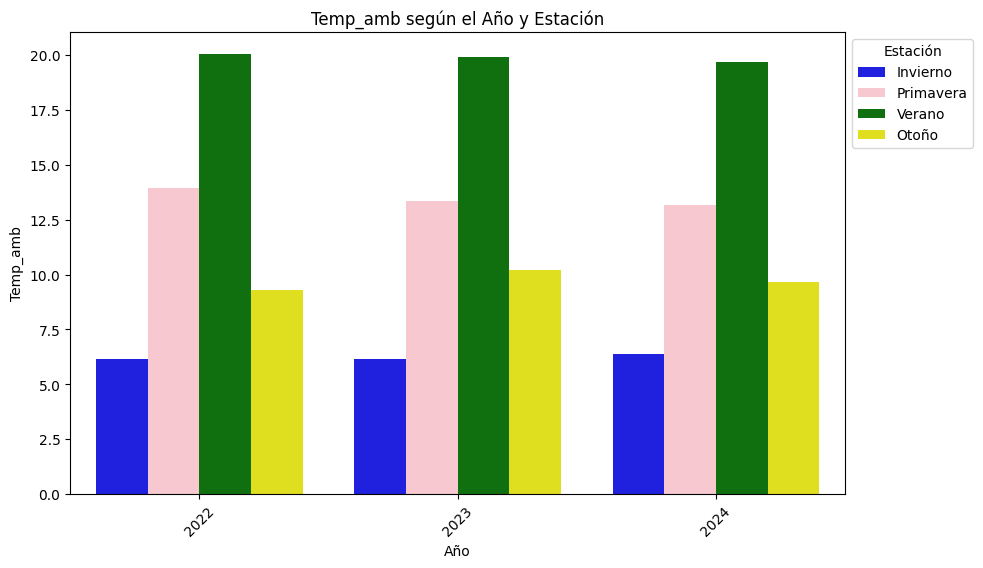

In [42]:
# Definir un diccionario de colores personalizados para cada estación
estacion_colors = {
    "Invierno": "blue",    
    "Primavera": "pink",   
    "Verano": "green",     
    "Otoño": "yellow"       
}

# Crear el gráfico con la paleta personalizada
plt.figure(figsize=(10, 6))

# Crear gráfico de barras con colores personalizados por estación
sns.barplot(data=df, x="Año", y="Temp_amb", hue="Estacion", ci=None, palette=estacion_colors)

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Temp_amb")
plt.title("Temp_amb según el Año y Estación")
plt.legend(title="Estación", bbox_to_anchor=(1, 1))  # Mover la leyenda
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

# Mostrar gráfico
plt.show()

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_2856\3873908046.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Año", y="Energia", hue="Estacion", ci=None, palette=estacion_colors)


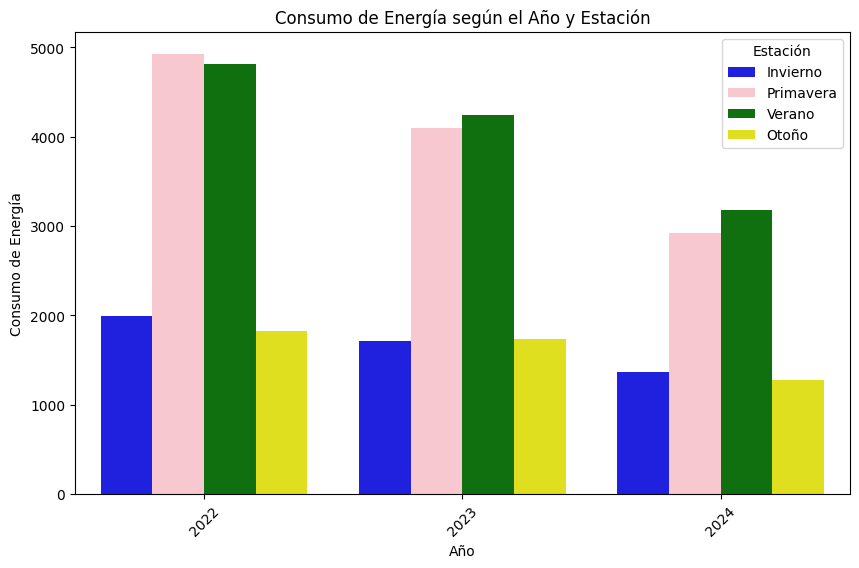

In [43]:
# Definir un diccionario de colores personalizados para cada estación
estacion_colors = {
    "Invierno": "blue",    
    "Primavera": "pink",   
    "Verano": "green",     
    "Otoño": "yellow"       
}

# Crear el gráfico con la paleta personalizada
plt.figure(figsize=(10, 6))

# Crear gráfico de barras con colores personalizados por estación
sns.barplot(data=df, x="Año", y="Energia", hue="Estacion", ci=None, palette=estacion_colors)

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Consumo de Energía")
plt.title("Consumo de Energía según el Año y Estación")
plt.legend(title="Estación", bbox_to_anchor=(1, 1))  # Mover la leyenda
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

# Mostrar gráfico
plt.show();


# 3. Feature Engineer

Una vez realizada la matriz de correlación se observa que hay varias columnas que nos dan una información similar y se pueden unir entre ellas para reducir el tamaño del
dataframe y poder tratar de una manera más optima los datos:
  - Se genera una nueva columna llamada Rad_prom que resulta de realizar el promedio de la Radiacion_1 y Radiacion_2.
  - Se eliminan las columnas Radiacion_1 y Radiacion_2.
  - Se genera una nueva columna llamada HeatsinkTemp_prom que resulta de realizar el promedio de la HeatsinkR, HeatsinkS, HeatsinkT.
  - Se eliminan las columnas HeatsinkR, HeatsinkS, HeatsinkT.
  - Se genera una nueva columna llamada Idc_total que resulta de realizar el sumatorio de todas las Idc que componen el dataframe.
  - Se eliminan las columnas Idc1, Idc2, Idc3, Idc4, Idc5, Idc6, Idc7, Idc8.
  - Se genera una nueva columna llamada V_total que resulta de realizar el sumatorio de V1, V2 y V3.
  - Se eliminan las columnas V1, V2, V3.

In [44]:
df['Rad_prom'] = df[['Radiacion_1', 'Radiacion_2']].mean(axis=1)
df = df.drop(columns=['Radiacion_1', 'Radiacion_2'])

df['HeatsinkTemp_prom'] = df[['HeatsinkRTemp', 'HeatsinkSTemp', 'HeatsinkTTemp']].mean(axis=1)
df = df.drop(columns=['HeatsinkRTemp', 'HeatsinkSTemp', 'HeatsinkTTemp'])

df['Idc_total'] = df[['Idc1', 'Idc2', 'Idc3', 'Idc4', 'Idc5', 'Idc6', 'Idc7', 'Idc8']].sum(axis=1)
df = df.drop(columns=['Idc1', 'Idc2', 'Idc3', 'Idc4', 'Idc5', 'Idc6', 'Idc7', 'Idc8'])

df['V_total'] = df[['V1', 'V2', 'V3']].sum(axis=1)
df = df.drop(columns=['V1', 'V2', 'V3'])

df.head()

Temp_amb  Dir_viento  Vel_viento    Energia  Potencia   Oil_Temp  cosPhi  \
0  11.346512  222.558422    2.611367  26.931747       0.0  26.079072     0.0   
1  11.300000  223.087589    2.582713   0.000000       0.0  25.479083     0.0   
2  11.306667  224.893609    2.640629   0.000000       0.0  24.879095     0.0   
3  11.293333  223.534547    2.808005   0.000000       0.0  24.279182     0.0   
4  11.259853  230.927235    3.147298   0.000000       0.0  23.745968     0.0   

   Frecuencia   Temp_int    Q   Año  Mes  Día  Hora  Minuto  Estacion  \
0   49.960499  20.329768  0.0  2022    1    1     0       0  Invierno   
1   49.959999  20.179770  0.0  2022    1    1     0      15  Invierno   
2   49.959999  20.029773  0.0  2022    1    1     0      30  Invierno   
3   49.959999  19.879776  0.0  2022    1    1     0      45  Invierno   
4   49.960503  19.741495  0.0  2022    1    1     1       0  Invierno   

   Rad_prom  HeatsinkTemp_prom  Idc_total      V_total  
0       0.0          17.075259        0.0  1146.307697  
1       0.0          16.883596        0.0  1147.522942  
2       0.0          16.691933        0.0  1150.385870  
3       0.0          16.506316        0.0  1153.091744  
4       0.0          16.404334        0.0  1150.639247

### Transformaciones de las variables generadas de la columna Fecha_Hora

1. Se necesita transformar la columna estacion a numerica para incluirla en el modelo.

In [45]:
# Crear un diccionario de mapeo
estacion_map = {
    "Invierno": 1,
    "Primavera": 2,
    "Verano": 3,
    "Otoño": 4
}

# Reemplazar valores de "Estacion" con números
df["Estacion"] = df["Estacion"].map(estacion_map)

2. A la columnas Minuto, Hora, Dia y Mes se les realiza una transformación con la función seno, esto nos permite representar estos valores de una forma que mantiene su naturaleza cíclica.

In [46]:
# Convertir los minutos a valores cíclicos usando seno y coseno
df["Minuto_sin"] = np.sin(2 * np.pi * df["Minuto"] / 60)  # Usamos el seno

# Hora: de 0 a 23 (24 horas)
df["Hora_sin"] = np.sin(2 * np.pi * df["Hora"] / 24)

# Día: de 0 a 6 (7 días de la semana)
df["Dia_sin"] = np.sin(2 * np.pi * df["Día"] / 7)

# Mes: de 1 a 12 (12 meses del año)
df["Mes_sin"] = np.sin(2 * np.pi * df["Mes"] / 12)

df.head()

Temp_amb  Dir_viento  Vel_viento    Energia  Potencia   Oil_Temp  cosPhi  \
0  11.346512  222.558422    2.611367  26.931747       0.0  26.079072     0.0   
1  11.300000  223.087589    2.582713   0.000000       0.0  25.479083     0.0   
2  11.306667  224.893609    2.640629   0.000000       0.0  24.879095     0.0   
3  11.293333  223.534547    2.808005   0.000000       0.0  24.279182     0.0   
4  11.259853  230.927235    3.147298   0.000000       0.0  23.745968     0.0   

   Frecuencia   Temp_int    Q  ...  Minuto  Estacion  Rad_prom  \
0   49.960499  20.329768  0.0  ...       0         1       0.0   
1   49.959999  20.179770  0.0  ...      15         1       0.0   
2   49.959999  20.029773  0.0  ...      30         1       0.0   
3   49.959999  19.879776  0.0  ...      45         1       0.0   
4   49.960503  19.741495  0.0  ...       0         1       0.0   

   HeatsinkTemp_prom  Idc_total      V_total    Minuto_sin  Hora_sin  \
0          17.075259        0.0  1146.307697  0.000000e+00  0.000000   
1          16.883596        0.0  1147.522942  1.000000e+00  0.000000   
2          16.691933        0.0  1150.385870  5.665539e-16  0.000000   
3          16.506316        0.0  1153.091744 -1.000000e+00  0.000000   
4          16.404334        0.0  1150.639247  0.000000e+00  0.258819   

    Dia_sin  Mes_sin  
0  0.781831      0.5  
1  0.781831      0.5  
2  0.781831      0.5  
3  0.781831      0.5  
4  0.781831      0.5  

[5 rows x 24 columns]

In [47]:
df = df.drop(columns=['Minuto','Mes','Día','Hora'])


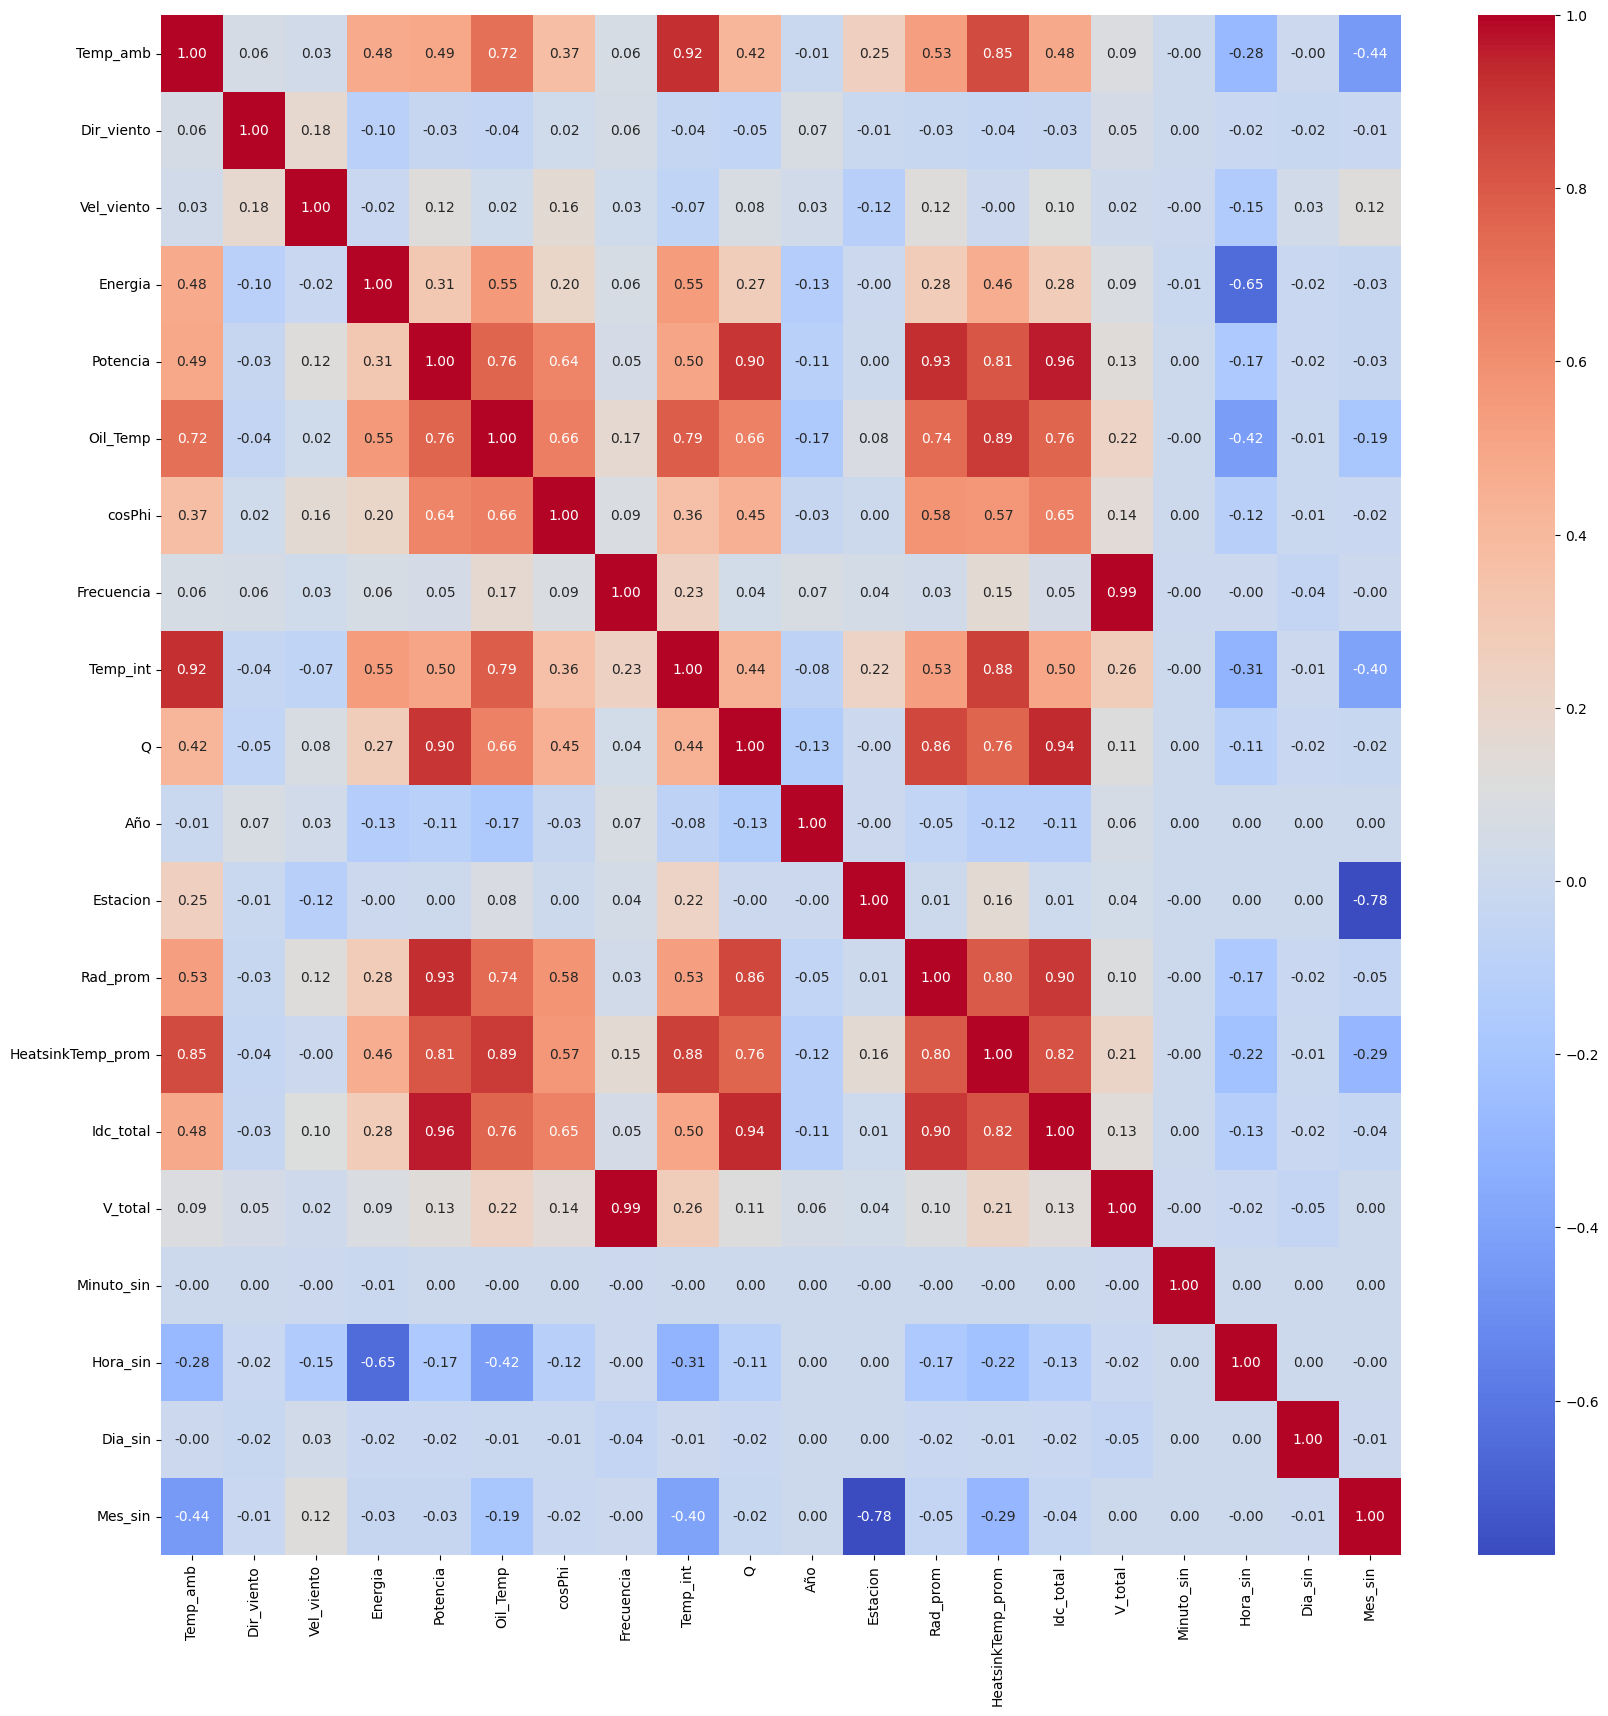

In [48]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# 4. Análisis univariante

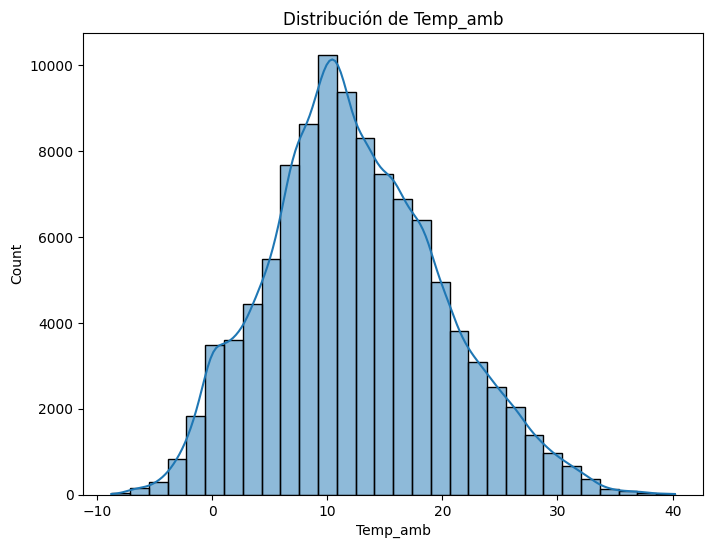

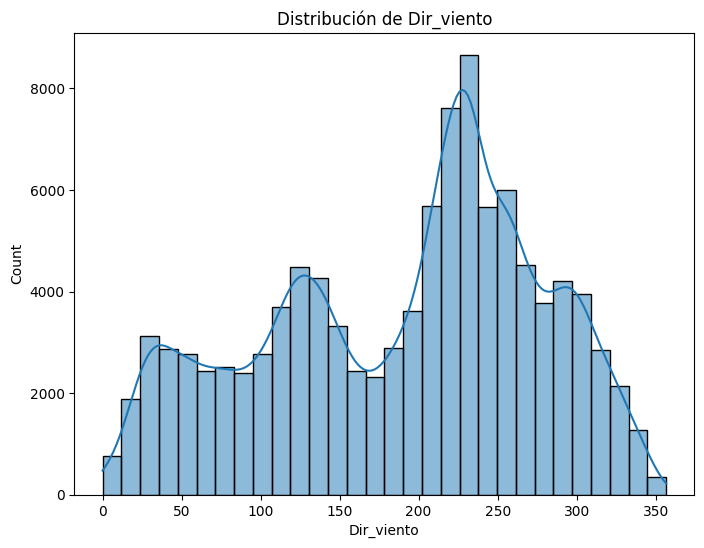

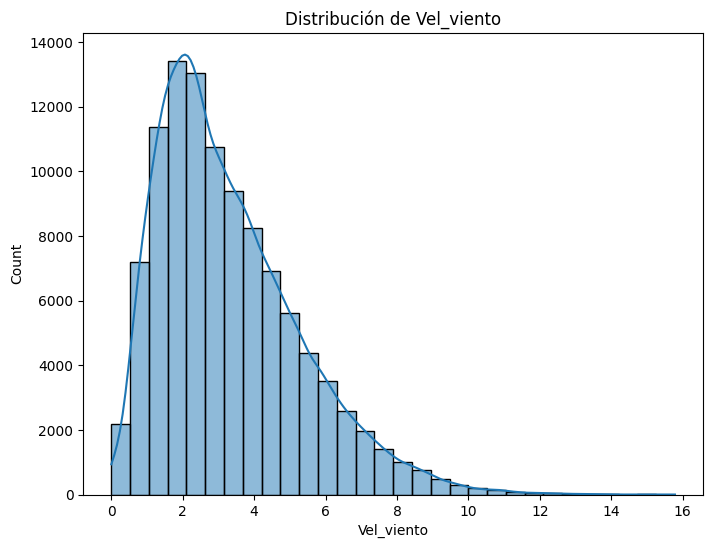

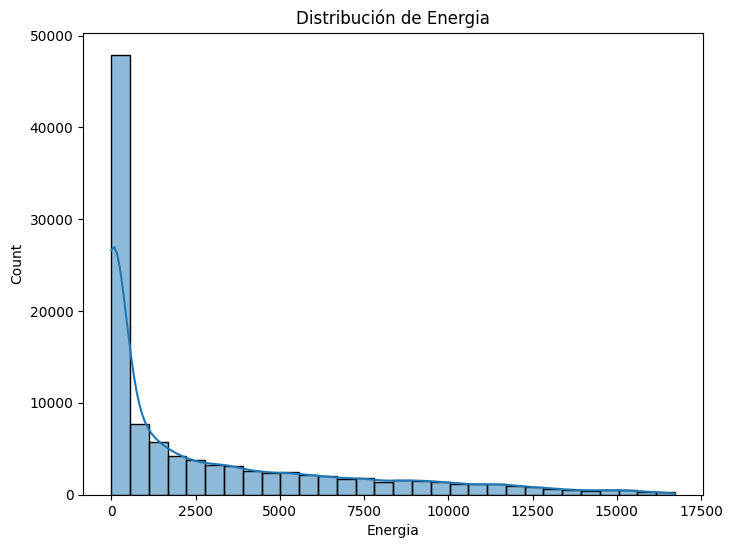

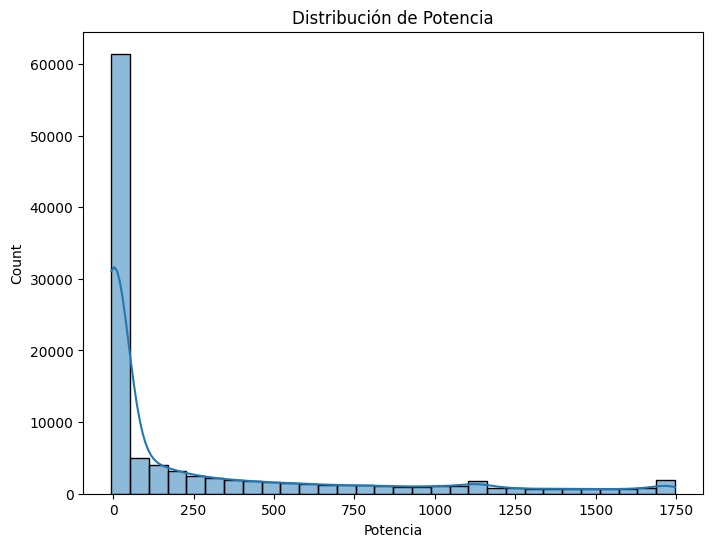

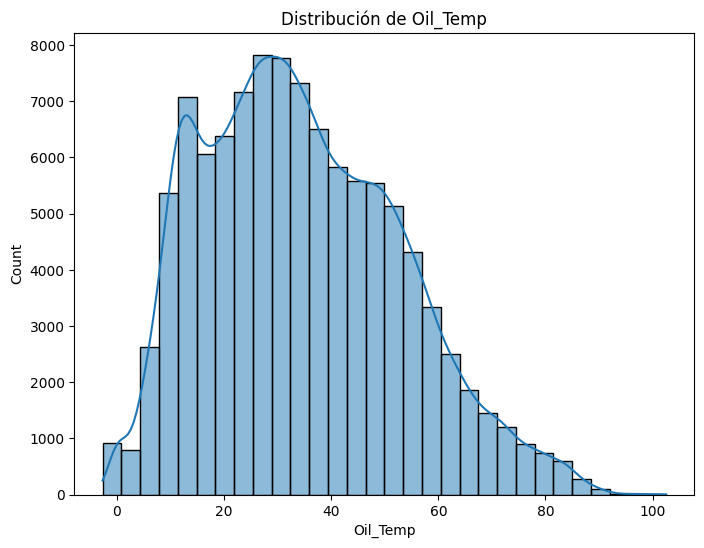

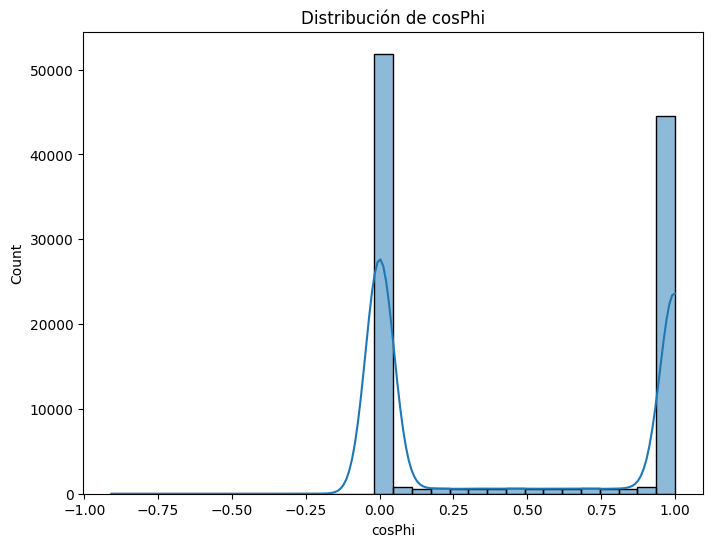

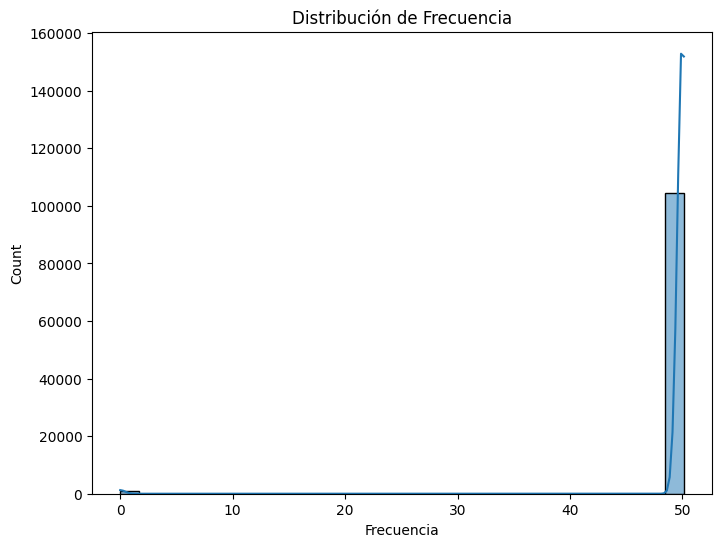

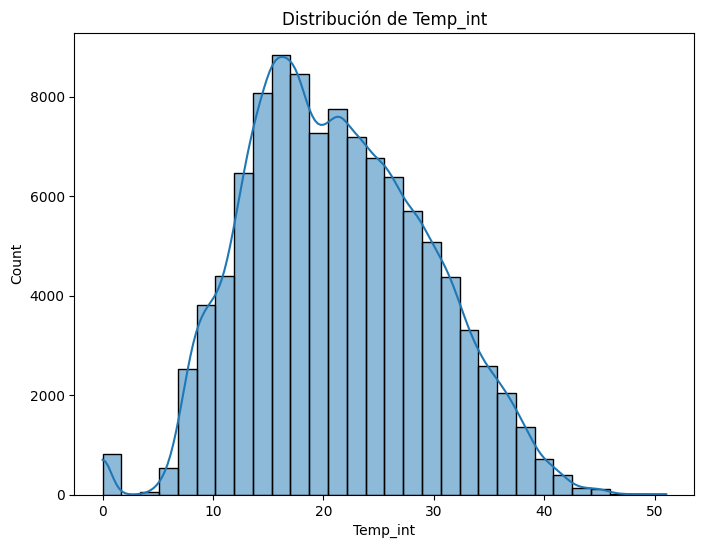

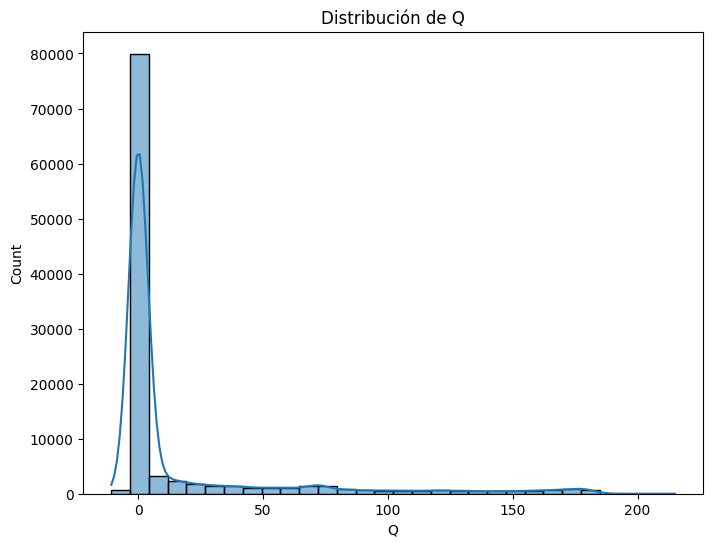

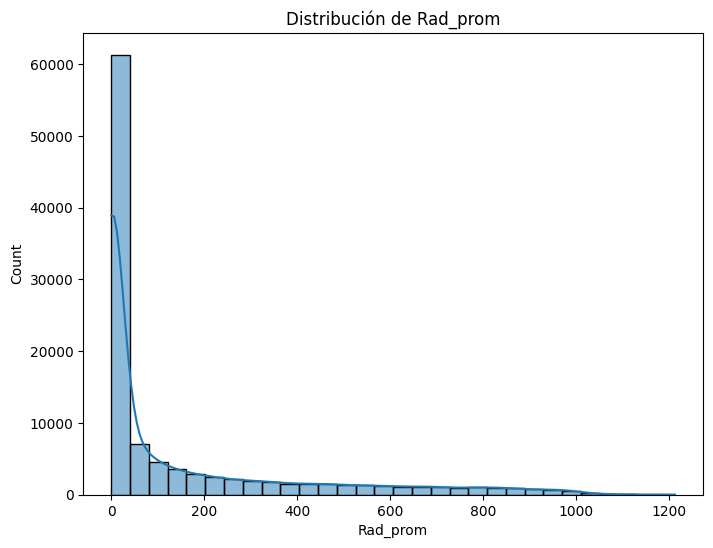

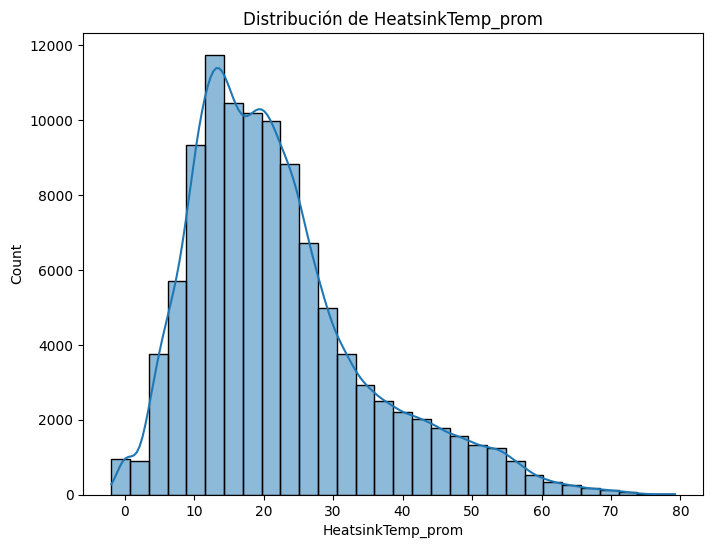

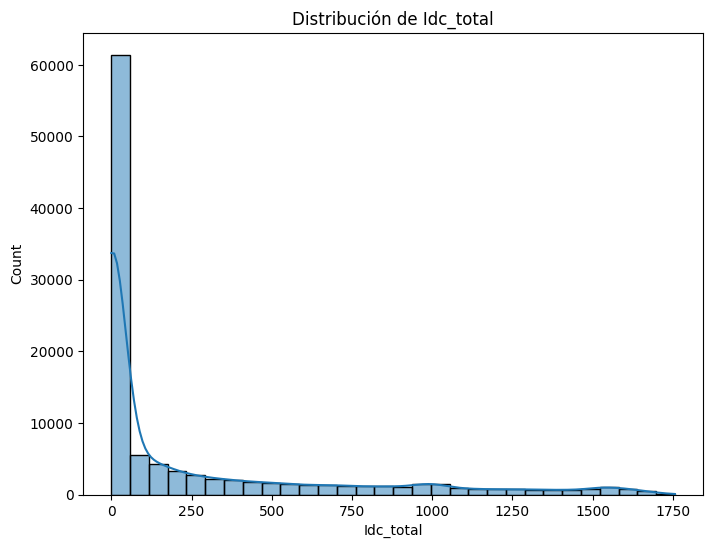

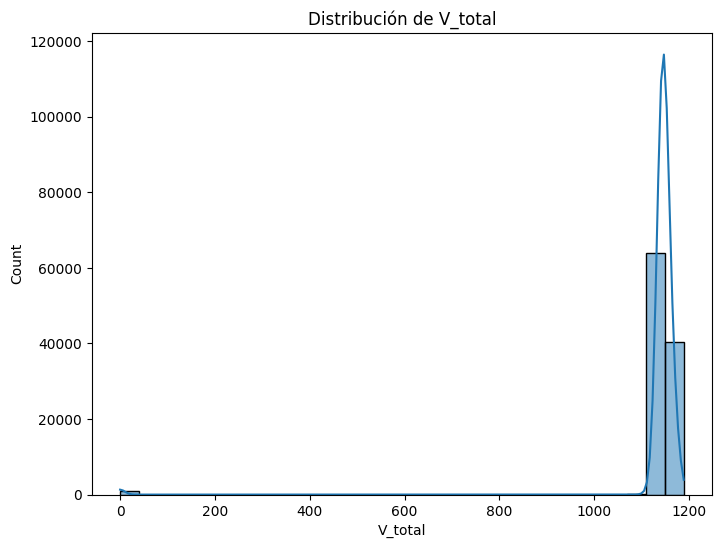

In [49]:
columnas_numericas = ['Temp_amb', 'Dir_viento', 'Vel_viento', 'Energia', 'Potencia',
       'Oil_Temp', 'cosPhi', 'Frecuencia', 'Temp_int', 'Q', 'Rad_prom',
       'HeatsinkTemp_prom', 'Idc_total', 'V_total']

# Generar histogramas y curvas KDE para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

# 6. Análisis Bivariante

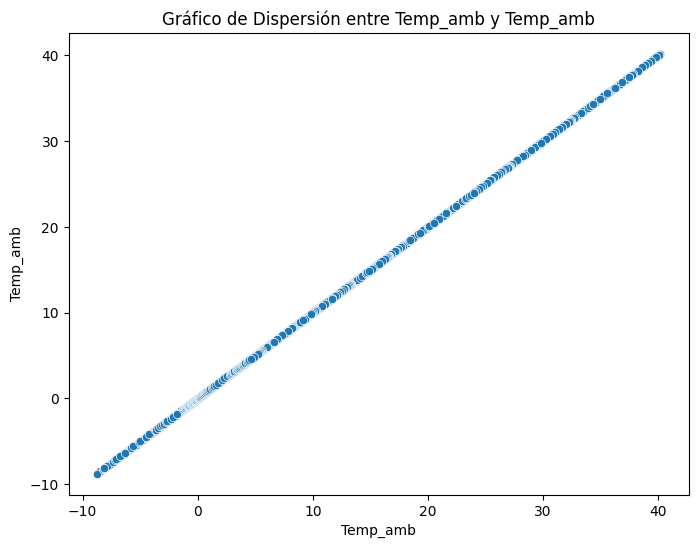

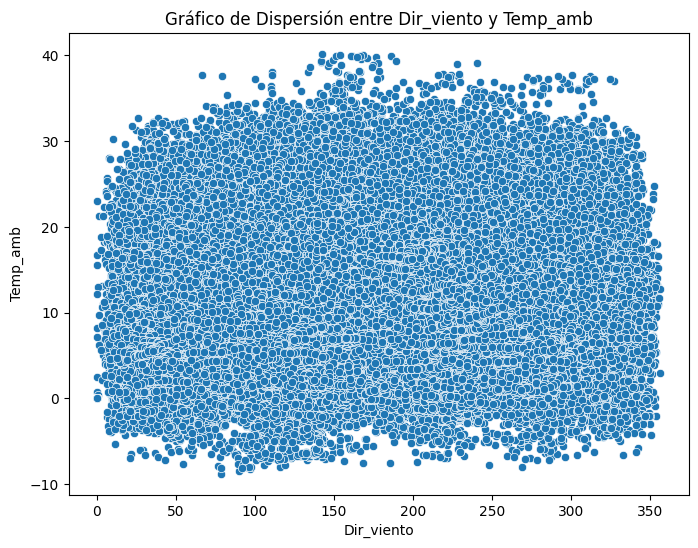

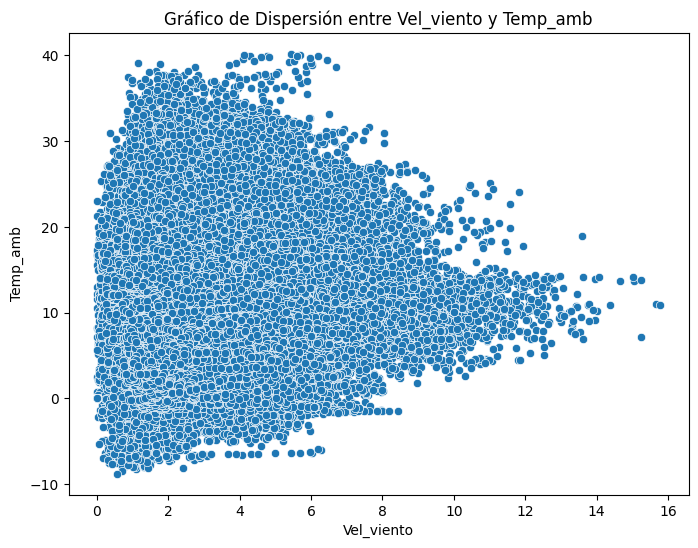

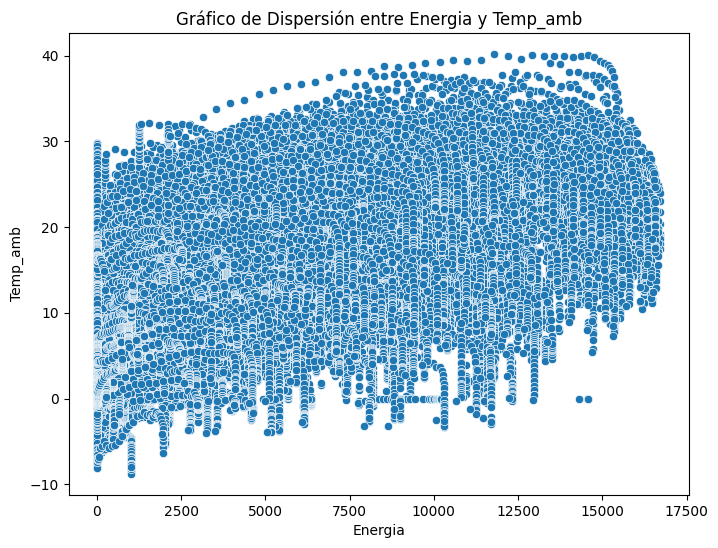

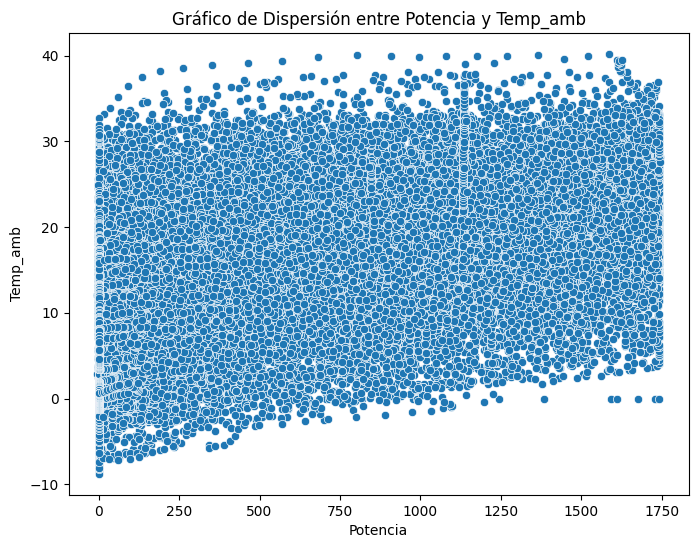

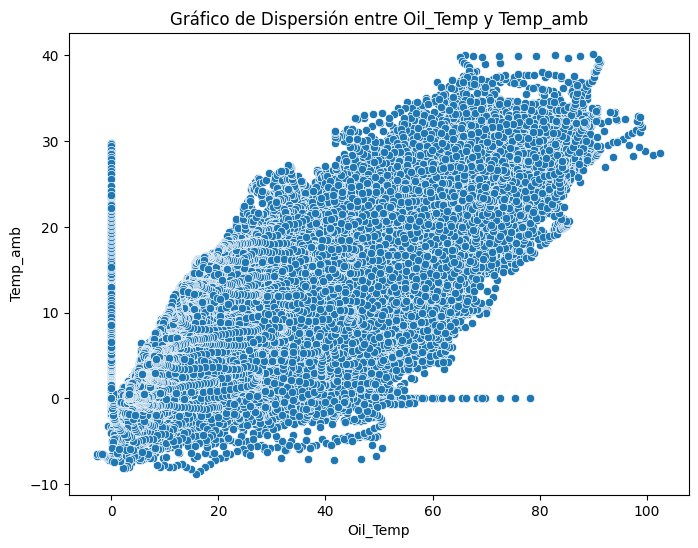

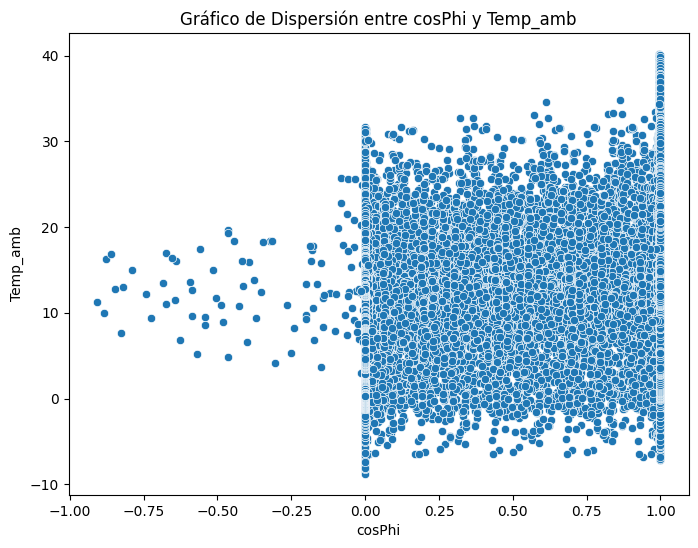

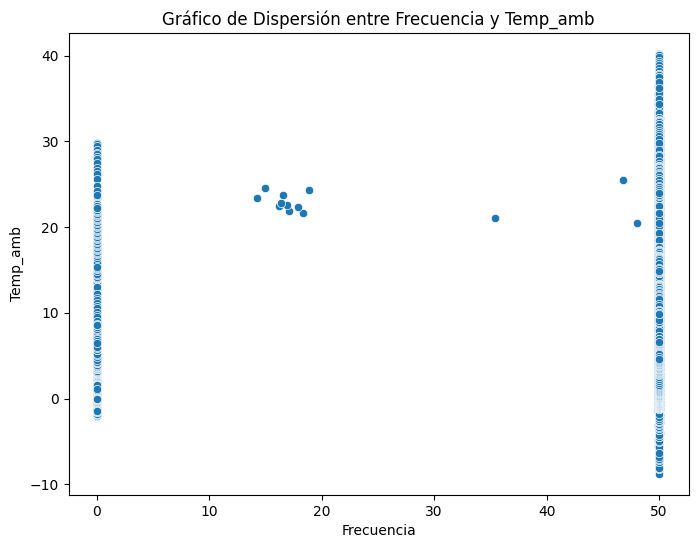

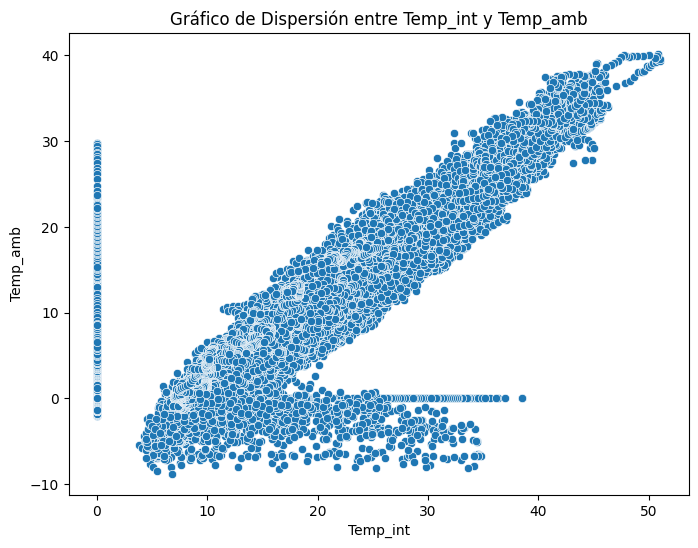

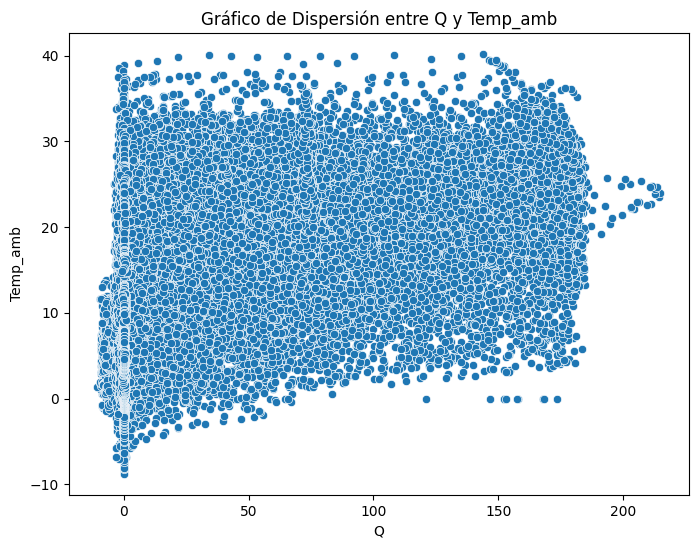

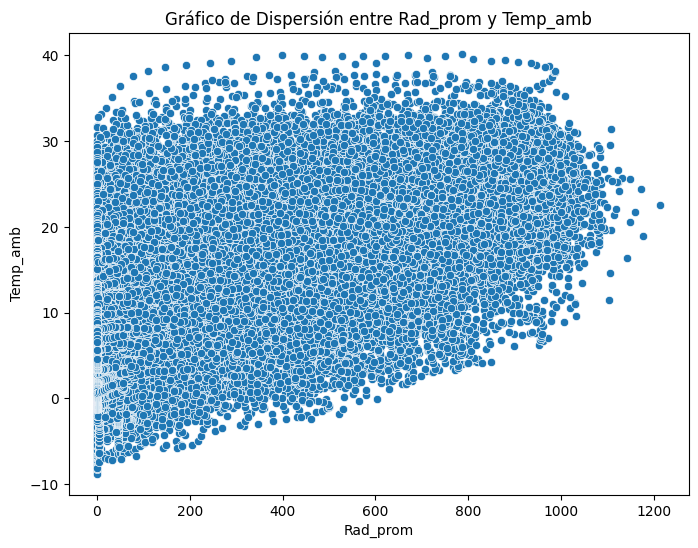

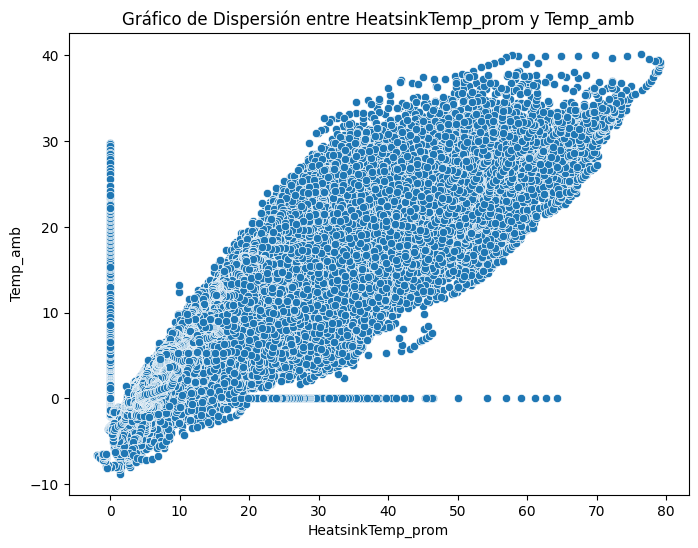

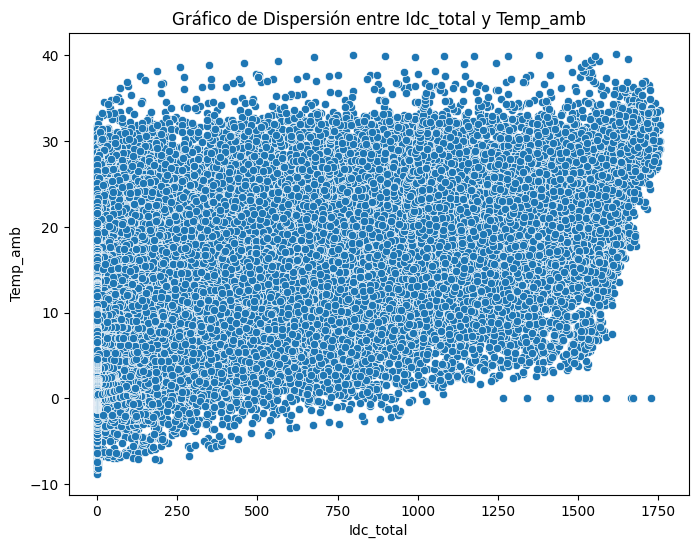

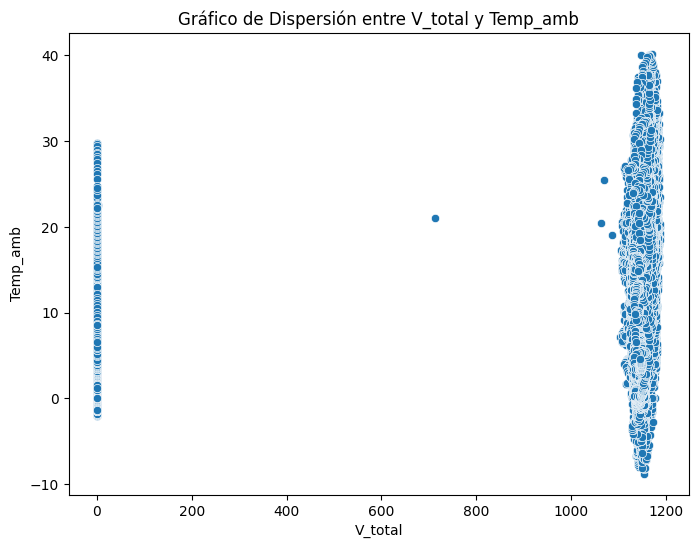

In [50]:
# Gráfico de dispersión entre cada columna numérica y la columna objetivo
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[columna], y=df['Temp_amb'])
    plt.title(f'Gráfico de Dispersión entre {columna} y Temp_amb')
    plt.show()

In [51]:
df.to_csv('C:/Users/javier.sdiaz/Proyecto ML_2025/data/processed/datos_procesados.csv', index=False, encoding='utf-8')
